<a href="https://www.kaggle.com/code/ngodingai/answer-logistic-regression-berat-kepiting?scriptVersionId=263153781" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crab-age-prediction/CrabAgePrediction.csv


In [2]:
df = pd.read_csv('/kaggle/input/crab-age-prediction/CrabAgePrediction.csv', usecols=['Length', 'Diameter', 'Height', 'Weight'])

In [3]:
df

,Length,Diameter,Height,Weight
0,1.4375,1.1750,0.4125,24.635715
1,0.8875,0.6500,0.2125,5.400580
2,1.0375,0.7750,0.2500,7.952035
3,1.1750,0.8875,0.2500,13.480187
4,0.8875,0.6625,0.2125,6.903103
...,...,...,...,...
3888,1.4625,1.1375,0.3250,24.819987
3889,1.5500,1.2125,0.4375,34.458817
3890,0.6250,0.4625,0.1625,2.012815
3891,1.0625,0.7750,0.2625,10.347568


# EDA

In [4]:
df.describe()

,Length,Diameter,Height,Weight
count,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275
std,0.300431,0.248233,0.104976,13.891201
min,0.187500,0.137500,0.000000,0.056699
25%,1.125000,0.875000,0.287500,12.672227
50%,1.362500,1.062500,0.362500,22.792998
75%,1.537500,1.200000,0.412500,32.786197
max,2.037500,1.625000,2.825000,80.101512


In [5]:
df.isna().sum()

Length      0
Diameter    0
Height      0
Weight      0
dtype: int64

<Axes: >

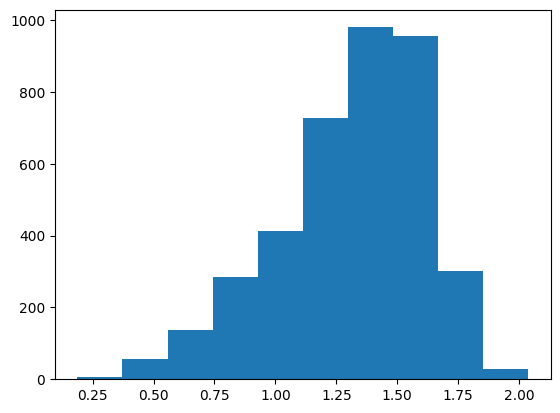

In [6]:
df['Length'].hist(grid=False)

<Axes: >

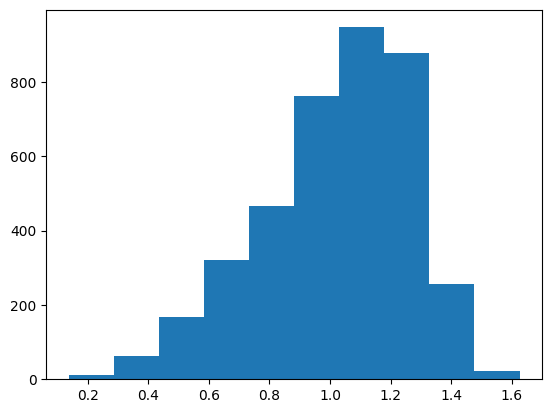

In [7]:
df['Diameter'].hist(grid=False)

<Axes: >

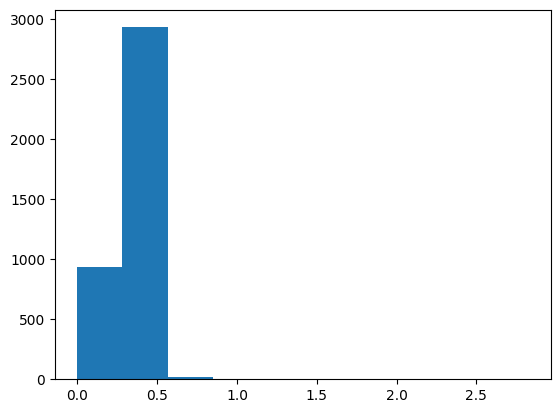

In [8]:
df['Height'].hist(grid=False)

<Axes: >

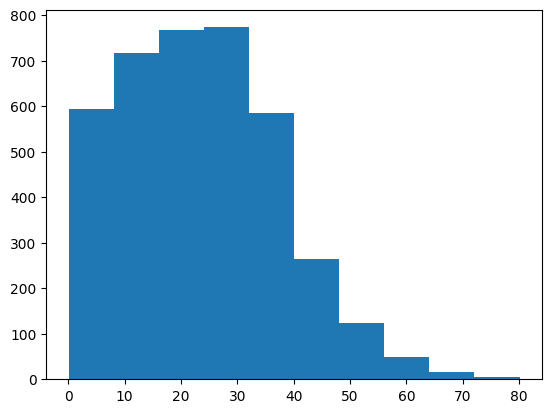

In [9]:
df['Weight'].hist(grid=False)

In [10]:
df['Weight_log'] = np.log(df['Weight'])

<Axes: >

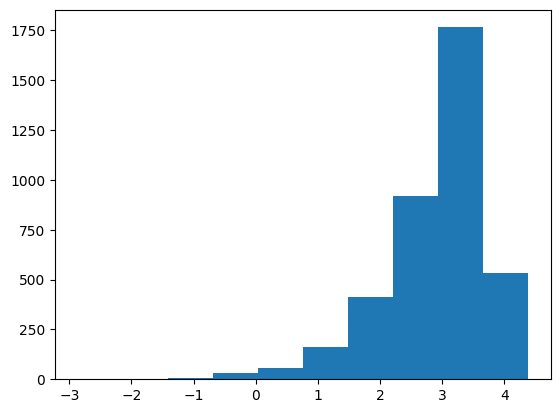

In [11]:
df['Weight_log'].hist(grid=False)

In [12]:
df.corr()

,Length,Diameter,Height,Weight,Weight_log
Length,1.000000,0.986653,0.823081,0.925374,0.966167
Diameter,0.986653,1.000000,0.829532,0.925770,0.963408
Height,0.823081,0.829532,1.000000,0.814405,0.826978
Weight,0.925374,0.925770,0.814405,1.000000,0.885401
Weight_log,0.966167,0.963408,0.826978,0.885401,1.000000


In [13]:
df['Length_log'] = np.log(df['Length'])

<Axes: xlabel='Length'>

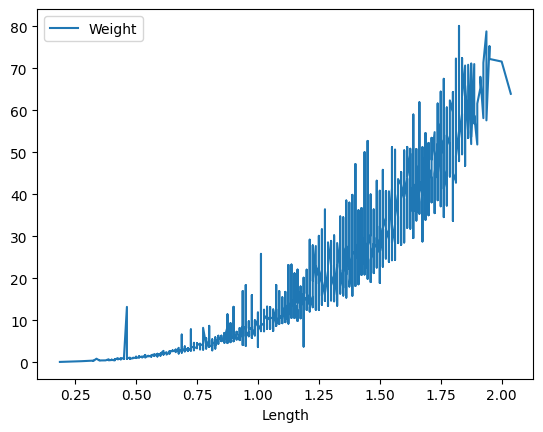

In [14]:
df.sort_values('Length').plot(x='Length', y='Weight')

<Axes: xlabel='Length_log'>

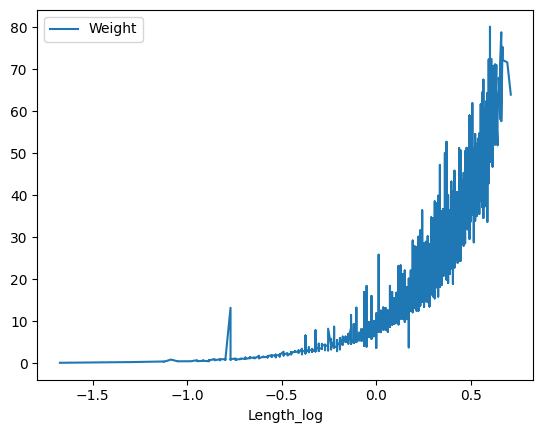

In [15]:
df.sort_values('Length_log').plot(x='Length_log', y='Weight')

# Split into Train and Test

In [16]:
df = df.reset_index()

In [17]:
df

,index,Length,Diameter,Height,Weight,Weight_log,Length_log
0,0,1.4375,1.1750,0.4125,24.635715,3.204197,0.362905
1,1,0.8875,0.6500,0.2125,5.400580,1.686506,-0.119347
2,2,1.0375,0.7750,0.2500,7.952035,2.073428,0.036814
3,3,1.1750,0.8875,0.2500,13.480187,2.601221,0.161268
4,4,0.8875,0.6625,0.2125,6.903103,1.931971,-0.119347
...,...,...,...,...,...,...,...
3888,3888,1.4625,1.1375,0.3250,24.819987,3.211649,0.380147
3889,3889,1.5500,1.2125,0.4375,34.458817,3.539765,0.438255
3890,3890,0.6250,0.4625,0.1625,2.012815,0.699534,-0.470004
3891,3891,1.0625,0.7750,0.2625,10.347568,2.336751,0.060625


In [18]:
df_train = df.sample(frac=0.7)


In [19]:
train_index = df_train['index'].values

In [20]:
df_test = df[df['index'].apply(lambda x: x not in train_index)].copy()

In [21]:
df_train

,index,Length,Diameter,Height,Weight,Weight_log,Length_log
36,36,1.1125,0.8625,0.2625,11.594945,2.450569,0.106610
2576,2576,1.3000,1.0625,0.3750,23.048143,3.137585,0.262364
3341,3341,1.7375,1.3125,0.4375,49.384829,3.899643,0.552447
1509,1509,1.4000,1.0625,0.3125,26.421734,3.274187,0.336472
1483,1483,1.5125,1.1250,0.4125,34.657264,3.545507,0.413764
...,...,...,...,...,...,...,...
1211,1211,1.4500,1.1375,0.3375,22.552027,3.115825,0.371564
2763,2763,1.3750,1.1125,0.3125,19.050864,2.947112,0.318454
1167,1167,1.5875,1.2375,0.3875,38.654543,3.654664,0.462160
1195,1195,1.5250,1.2000,0.3500,30.121344,3.405234,0.421994


In [22]:
df_test

,index,Length,Diameter,Height,Weight,Weight_log,Length_log
0,0,1.4375,1.1750,0.4125,24.635715,3.204197,0.362905
3,3,1.1750,0.8875,0.2500,13.480187,2.601221,0.161268
5,5,1.5500,1.1625,0.3500,28.661344,3.355549,0.438255
13,13,1.3750,1.0750,0.3625,20.184844,3.004932,0.318454
15,15,1.6375,1.2875,0.5000,42.354153,3.746066,0.493171
...,...,...,...,...,...,...,...
3877,3877,1.6375,1.2875,0.4500,40.029494,3.689617,0.493171
3878,3878,1.2000,0.9125,0.3375,18.129505,2.897541,0.182322
3882,3882,1.1000,0.8875,0.3000,14.033003,2.641412,0.095310
3890,3890,0.6250,0.4625,0.1625,2.012815,0.699534,-0.470004


# Linear Model: Estimasi nilai Beta

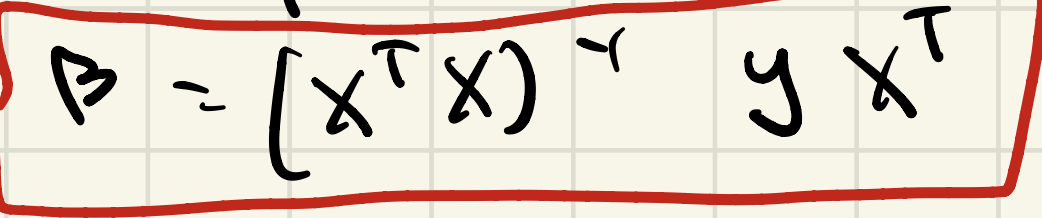

$$\beta = (X^T X)^{-1} y X^T$$

$$\hat{y} = X^T \beta$$

In [23]:
df_train['intercept'] = 1
df_test['intercept'] = 1

In [24]:
X = df_train[['intercept', 'Length']].values

In [25]:
X.shape

(2725, 2)

In [26]:
X

array([[1.    , 1.1125],
       [1.    , 1.3   ],
       [1.    , 1.7375],
       ...,
       [1.    , 1.5875],
       [1.    , 1.525 ],
       [1.    , 1.0125]])

In [27]:
y = df_train['Weight'].values

In [28]:
y.shape

(2725,)

In [29]:
beta = np.linalg.inv(X.T@X)@ (np.dot(y.T, X))

In [30]:
beta

array([-32.57885185,  42.85006997])

$$\hat{y_i} = -32.4 + 42.6x_i$$

In [31]:
y_hat_func = lambda x: beta[0] + (beta[1] * x)

In [32]:
y_hat_func(1.5750)

34.9100083522418

In [33]:
df_train

,index,Length,Diameter,Height,Weight,Weight_log,Length_log,intercept
36,36,1.1125,0.8625,0.2625,11.594945,2.450569,0.106610,1
2576,2576,1.3000,1.0625,0.3750,23.048143,3.137585,0.262364,1
3341,3341,1.7375,1.3125,0.4375,49.384829,3.899643,0.552447,1
1509,1509,1.4000,1.0625,0.3125,26.421734,3.274187,0.336472,1
1483,1483,1.5125,1.1250,0.4125,34.657264,3.545507,0.413764,1
...,...,...,...,...,...,...,...,...
1211,1211,1.4500,1.1375,0.3375,22.552027,3.115825,0.371564,1
2763,2763,1.3750,1.1125,0.3125,19.050864,2.947112,0.318454,1
1167,1167,1.5875,1.2375,0.3875,38.654543,3.654664,0.462160,1
1195,1195,1.5250,1.2000,0.3500,30.121344,3.405234,0.421994,1


In [34]:
np.dot(y.T, X)

array([64707.29433285, 95753.80611979])

# Prediksi Weight

In [35]:
df_test['y_predict'] = df_test['Length'].apply(lambda x: y_hat_func(x))

In [36]:
df_train['y_predict'] = df_train['Length'].apply(lambda x: y_hat_func(x))

In [37]:
df_train

,index,Length,Diameter,Height,Weight,Weight_log,Length_log,intercept,y_predict
36,36,1.1125,0.8625,0.2625,11.594945,2.450569,0.106610,1,15.091851
2576,2576,1.3000,1.0625,0.3750,23.048143,3.137585,0.262364,1,23.126239
3341,3341,1.7375,1.3125,0.4375,49.384829,3.899643,0.552447,1,41.873145
1509,1509,1.4000,1.0625,0.3125,26.421734,3.274187,0.336472,1,27.411246
1483,1483,1.5125,1.1250,0.4125,34.657264,3.545507,0.413764,1,32.231879
...,...,...,...,...,...,...,...,...,...
1211,1211,1.4500,1.1375,0.3375,22.552027,3.115825,0.371564,1,29.553750
2763,2763,1.3750,1.1125,0.3125,19.050864,2.947112,0.318454,1,26.339994
1167,1167,1.5875,1.2375,0.3875,38.654543,3.654664,0.462160,1,35.445634
1195,1195,1.5250,1.2000,0.3500,30.121344,3.405234,0.421994,1,32.767505


# Hitung Error (Mean Absolute Error)

In [38]:
np.abs((df_train['Weight'] - df_train['y_predict']).values).mean()

3.9816304712419273

In [39]:
np.abs((df_test['Weight'] - df_test['y_predict']).values).mean()

3.756329023743732

In [40]:
import matplotlib.pyplot as plt

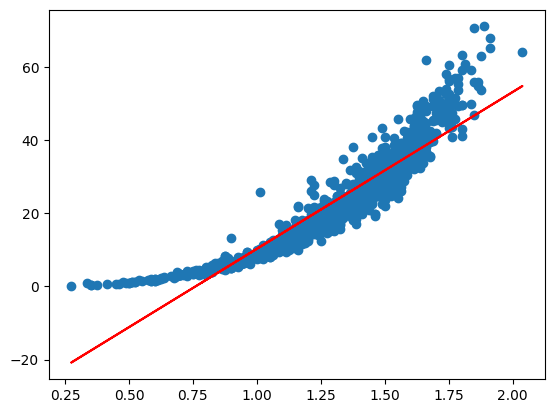

In [41]:
plt.scatter(x=df_test['Length'], y=df_test['Weight'])
plt.plot(df_test['Length'], df_test['y_predict'], color='red')
plt.show()

# Logistic Regression

In [42]:
df_train['Weight_binary'] = df_train['Weight'].apply(lambda x: 1 if x> 23 else 0)
df_test['Weight_binary'] = df_test['Weight'].apply(lambda x: 1 if x> 23 else 0)

In [43]:
X_train = df_train[['intercept', 'Length']].values
X_test = df_test[['intercept', 'Length']].values

y_train = df_train['Weight_binary'].values
y_test = df_test['Weight_binary'].values


# Fungsi
Buat Fungsi untuk:
- Sigmoid
- Compute Gradient
- Initialize Beta
- Apply Gradient
- Compute NLL
- Predict Proba
- Predict

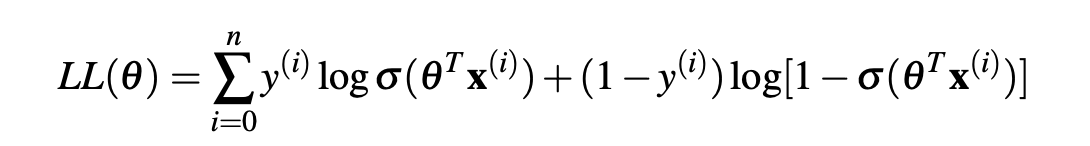

In [44]:
def sigmoid(z):
    res = 1/ (1+np.exp(-z))
    return res

In [45]:
def compute_NLL(y_hat, y):
    part_1 = y * np.log(y_hat)
    part_2 = (1-y) * np.log(1-y_hat)
    NLL = part_1 + part_2
    return NLL.mean() * -1

In [46]:
def compute_gradient(x, y, y_hat):
    gradient = x.T@(y_hat-y)
    return gradient/y_train.shape[0]

In [47]:
def initialize_beta(n):
    beta_0 = np.random.uniform(size=n)
    return beta_0

In [48]:
def apply_gradient(beta, gradient, learning_rate=0.001):
    beta_new = beta - (gradient * learning_rate)
    return beta_new

In [49]:
def predict_proba(x, beta):
    z = x@beta
    y_hat = sigmoid(z)
    return y_hat

def predict(x, beta):
    z = x@beta
    y_hat = sigmoid(z)
    y_pred = y_hat > 0.5
    y_pred = y_pred.astype('int')    
    return y_pred
    

In [50]:
n_epoch = 100

# Training

n_beta = X_train.shape[1]
beta = initialize_beta(n_beta)

for i in range(n_epoch):
    z = X_train@beta
    y_hat = sigmoid(z)
    y_pred = y_hat > 0.5
    y_pred = y_pred.astype('int')
    NLL_train = compute_NLL(y_hat, y_train)
    gradient = compute_gradient(X_train, y_train, y_hat)

    beta = apply_gradient(beta, gradient, learning_rate=1)

    print(f'Epoch {i} - Loss - NLL: {NLL_train}, gradient: {gradient}')

Epoch 0 - Loss - NLL: 0.8346676701601838, gradient: [0.29511328 0.28157586]
Epoch 1 - Loss - NLL: 0.7086508263965131, gradient: [0.16775322 0.11181015]
Epoch 2 - Loss - NLL: 0.6794021479053757, gradient: [0.09492894 0.01423984]
Epoch 3 - Loss - NLL: 0.6717543572227955, gradient: [ 0.06730287 -0.02229059]
Epoch 4 - Loss - NLL: 0.6669114004229412, gradient: [ 0.05794514 -0.03406137]
Epoch 5 - Loss - NLL: 0.6624283882915724, gradient: [ 0.05467601 -0.03757889]
Epoch 6 - Loss - NLL: 0.6580463020217693, gradient: [ 0.05334838 -0.03846994]
Epoch 7 - Loss - NLL: 0.6537380820367954, gradient: [ 0.0526349  -0.03853586]
Epoch 8 - Loss - NLL: 0.6494999511120166, gradient: [ 0.05211723 -0.03834447]
Epoch 9 - Loss - NLL: 0.6453304452130482, gradient: [ 0.05166402 -0.03807407]
Epoch 10 - Loss - NLL: 0.6412283363936117, gradient: [ 0.05123403 -0.03778071]
Epoch 11 - Loss - NLL: 0.6371924278289092, gradient: [ 0.05081435 -0.03748199]
Epoch 12 - Loss - NLL: 0.633221534181886, gradient: [ 0.05040091 -0.

In [51]:
yp_train = predict(X_train, beta)
yp_test = predict(X_test, beta)

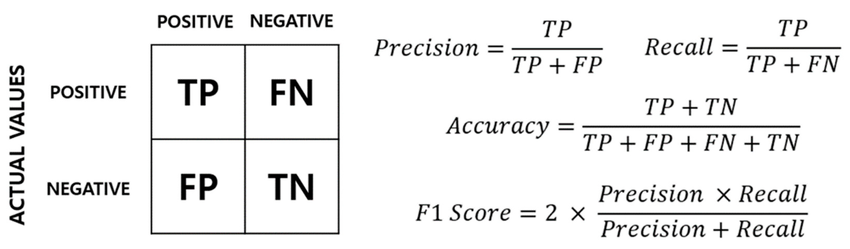
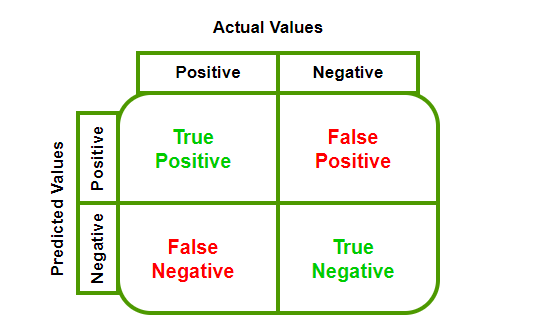
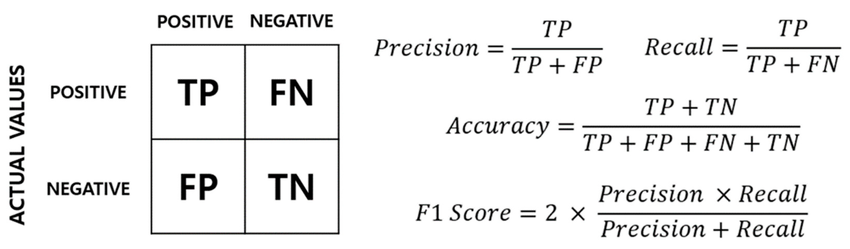
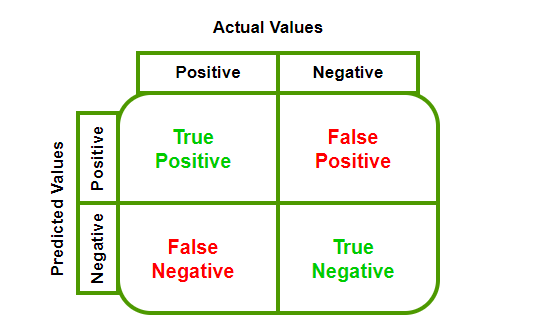

In [52]:
def compute_confusion_matrix(y, y_pred):
    TP = np.where((y==1) & (y_pred==1))[0].shape[0]
    FP = np.where((y==0) & (y_pred==1))[0].shape[0]
    FN = np.where((y==1) & (y_pred==0))[0].shape[0]
    TN = np.where((y==0) & (y_pred==0))[0].shape[0]
    return TP, FP, FN, TN

In [53]:
def compute_metrics(TP, FP, FN, TN):
    accuracy =  (TP + TN) / (TP + FP + FN + TN)
    precision =  TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score =  2 * (precision * recall)/ (precision + recall)
    print(f'accuracy: {accuracy}')
    print(f'precision: {precision}')
    print(f'recall: {recall}')
    print(f'f1_score: {f1_score}')
    

def compute_metrics_all(y, y_pred):
    TP, FP, FN, TN = compute_confusion_matrix(y, y_pred)
    compute_metrics(TP, FP, FN, TN)

In [54]:
compute_metrics_all(y_train, yp_train)

accuracy: 0.881834862385321
precision: 0.813939393939394
recall: 0.9889543446244478
f1_score: 0.8929521276595744


In [55]:
compute_metrics_all(y_test, yp_test)

accuracy: 0.8921232876712328
precision: 0.8249258160237388
recall: 0.9858156028368794
f1_score: 0.8982229402261711
